https://course.spacy.io/en/chapter4

https://spacy.io/

to create an English nlp object, you can import spacy and use the spacy.blank method to create a blank English pipeline. You can use the nlp object like a function to analyze text.

It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages.

In [ ]:
# Import spaCy
import spacy

# Create a blank English nlp object
nlp = spacy.blank("en")

behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

see the difference below when uing nlp oject and when not.

In [ ]:
words= 'hi i love you '
for i in words:
  print(i)

h
i
 
i
 
l
o
v
e
 
y
o
u
 


In [ ]:
words = nlp('hi i love you')
for i in words:
  print(i)

hi
i
love
you


Here you can see some of the available token attributes:

i is the index of the token within the parent document.

text returns the token text.

is_alpha, is_punct and like_num return boolean values indicating whether the token consists of alphabetic characters, whether it's punctuation or whether it resembles a number. For example, a token "10" – one, zero – or the word "ten" – T, E, N.

These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.

In [ ]:
doc = nlp("I like tree kangaroos and narwhals.")

In [ ]:
print("Index:   ", [token.i for token in doc])
print("Text:    ", [token.text for token in doc])

print("is_alpha:", [token.is_alpha for token in doc])
print("is_punct:", [token.is_punct for token in doc])
print("like_num:", [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4, 5, 6]
Text:     ['I', 'like', 'tree', 'kangaroos', 'and', 'narwhals', '.']
is_alpha: [True, True, True, True, True, True, False]
is_punct: [False, False, False, False, False, False, True]
like_num: [False, False, False, False, False, False, False]


In [ ]:
doc[2:4]

tree kangaroos

Trained pipeline components have statistical models that enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

Pipelines are trained on large datasets of labeled example texts.

They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

spaCy provides a number of trained pipeline packages you can download using the spacy download command. For example, the "en_core_web_sm" package is a small English pipeline that supports all core capabilities and is trained on web text.

The spacy.load method loads a pipeline package by name and returns an nlp object.

The package provides the binary weights that enable spaCy to make predictions.

It also includes the vocabulary, meta information about the pipeline and the configuration file used to train it. It tells spaCy which language class to use and how to configure the processing pipeline.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

She PRON
ate VERB
the DET
pizza NOUN


For each token in the doc, we can print the text and the .pos_ attribute, the predicted part-of-speech tag

In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an integer ID value

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The .dep_ attribute returns the predicted dependency label.

The .head attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.
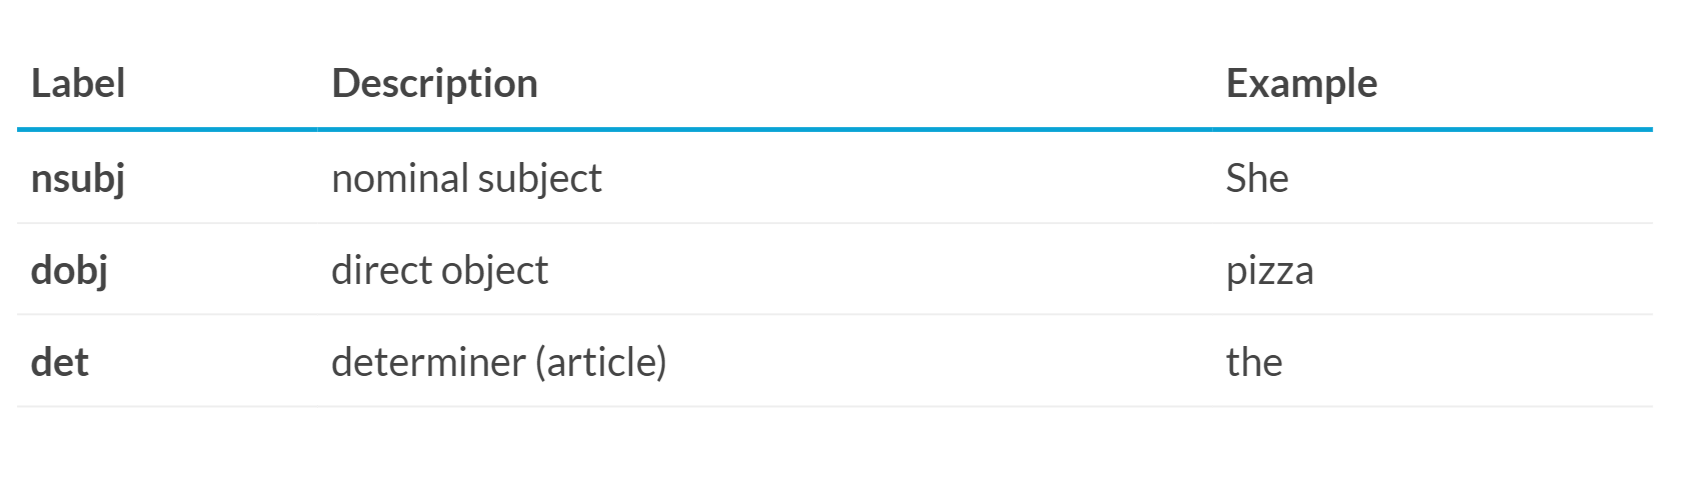

###Predicting Named Entities

Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

The doc.ents property lets you access the named entities predicted by the named entity recognition model.

It returns an iterator of Span objects, so we can print the entity text and the entity label using the .label_ attribute.

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money

In [ ]:
# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
U.K. GPE
$1 billion MONEY


In [ ]:
doc.ents[0]

Apple

In [ ]:
spacy.explain("GPE")

'Countries, cities, states'

#Rule-based matching

Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values.

In this example, we're looking for two tokens with the text "iPhone" and "X".

We can also match on other token attributes. Here, we're looking for two tokens whose lowercase forms equal "iphone" and "x".

We can even write patterns using attributes predicted by a model. Here, we're matching a token with the lemma "buy", plus a noun. The lemma is the base form, so this pattern would match phrases like "buying milk" or "bought flowers".

In [ ]:
#Match exact token texts

[{"TEXT": "iPhone"}, {"TEXT": "X"}]
#Match lexical attributes
[{"LOWER": "iphone"}, {"LOWER": "x"}]
#Match any token attributes
[{"LEMMA": "buy"}, {"POS": "NOUN"}]

[{'LEMMA': 'buy'}, {'POS': 'NOUN'}]

To use a pattern, we first import the matcher from spacy.matcher.

We also load a pipeline and create the nlp object.

The matcher is initialized with the shared vocabulary, nlp.vocab. You'll learn more about this later – for now, just remember to always pass it in.

The matcher.add method lets you add a pattern. The first argument is a unique ID to identify which pattern was matched. The second argument is a list of patterns.

To match the pattern on a text, we can call the matcher on any doc.

This will return the matches.

In [ ]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text'
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

When you call the matcher on a doc, it returns a list of tuples.

Each tuple consists of three values: the match ID, the start index and the end index of the matched span.

This means we can iterate over the matches and create a Span object: a slice of the doc at the start and end index.

match_id: hash value of the pattern name
start: start index of matched span
end: end index of matched span

In [ ]:
# Call the matcher on the doc
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [ ]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
doc = nlp("2018 FIFA World Cup: France won!")

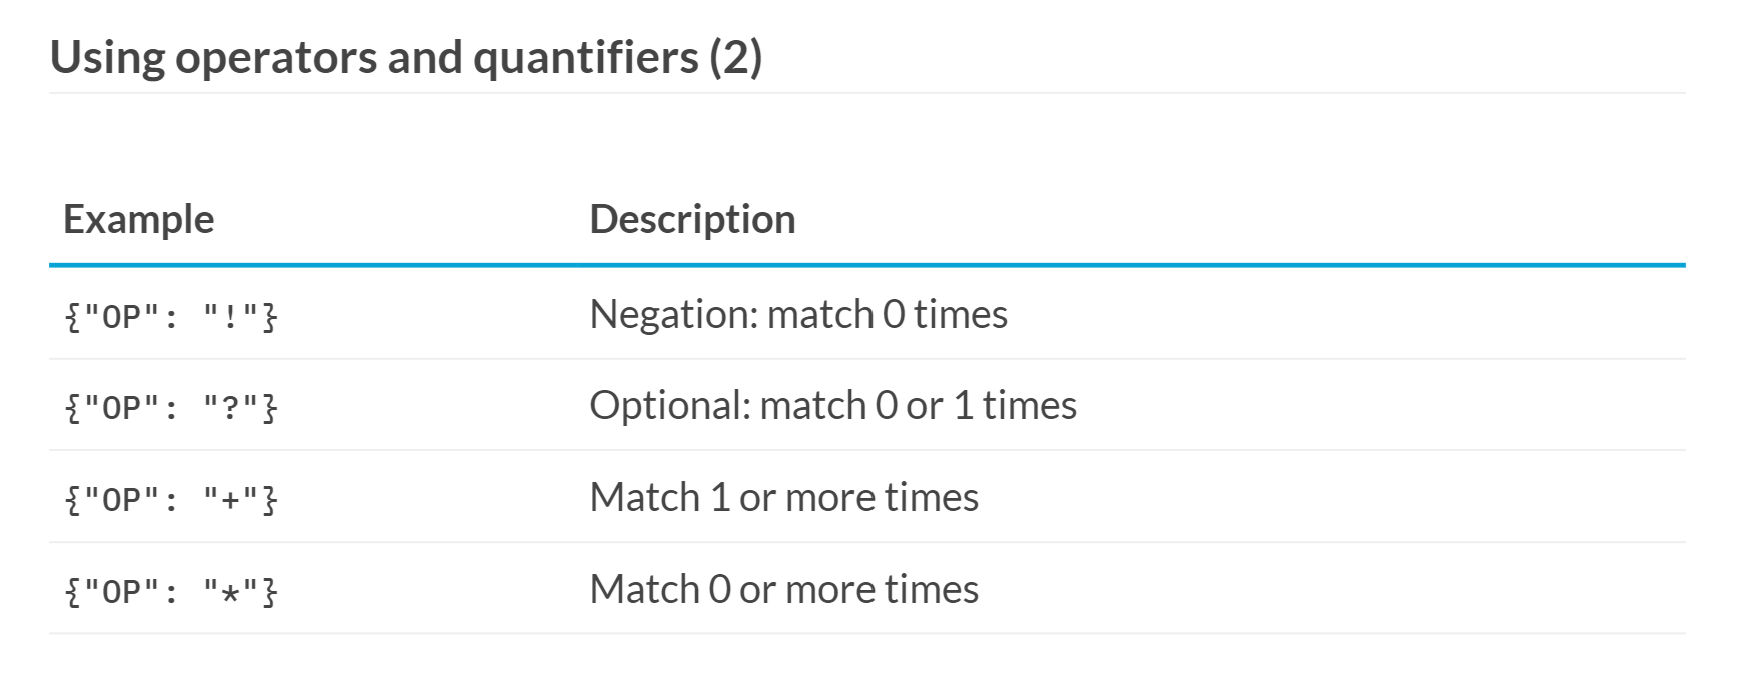

In [ ]:
pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]
doc = nlp("I bought a smartphone. Now I'm buying apps.")

## Shared vocab and string store (1)

spaCy stores all shared data in a vocabulary, the Vocab.

This includes words, but also the labels schemes for tags and entities.

To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as nlp.vocab.strings.

It's a lookup table that works in both directions. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

Hash IDs can't be reversed, though. If a word is not in the vocabulary, there's no way to get its string. That's why we always need to pass around the shared vocab.

In [ ]:
nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]
#Hashes can't be reversed – that's why we need to provide the shared vocab
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

In [ ]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


In [ ]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


###Lexemes: entries in the vocabulary
Lexemes are context-independent entries in the vocabulary.

You can get a lexeme by looking up a string or a hash ID in the vocab.

Lexemes expose attributes, just like tokens.

They hold context-independent information about a word, like the text, or whether the word consists of alphabetic characters.

Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.

In [ ]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


###The Doc object
The Doc is one of the central data structures in spaCy. It's created automatically when you process a text with the nlp object. But you can also instantiate the class manually.

After creating the nlp object, we can import the Doc class from spacy.tokens.

Here we're creating a doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!

The Doc class takes three arguments: the shared vocab, the words and the spaces

In [ ]:
# Create an nlp object
import spacy
nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

In [ ]:
doc

Hello world!

To create a Span manually, we can also import the class from spacy.tokens. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.

The doc.ents are writable, so we can add entities manually by overwriting it with a list of spans.

In [ ]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

In [ ]:
span

Hello world

In [ ]:
span_with_label

Hello world

In [ ]:

doc.ents

(Hello world,)

##Comparing semantic similarity
spaCy can compare two objects and predict similarity
Doc.similarity(), Span.similarity() and Token.similarity()
Take another object and return a similarity score (0 to 1)

In [ ]:
!python -m spacy download en_core_web_md

2024-01-07 06:57:26.097300: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-07 06:57:26.097371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-07 06:57:26.098859: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-07 06:57:27.588301: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 12.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8698332283318978


In [ ]:
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.685019850730896


In [ ]:
nlp = spacy.load("en_core_web_md")

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(bananas_vector)

[-2.1689e-01 -2.5989e+00 -1.3144e+00  2.2500e+00 -4.6767e-01 -2.0695e+00
 -6.3379e-01 -4.0222e-01 -3.4022e+00 -3.6932e-01 -7.9938e-01 -1.0412e+00
  9.3756e-01  1.6070e+00  8.8330e-01 -2.8483e+00  1.3349e-01 -3.1656e+00
  8.1896e-01 -4.8113e+00  1.5655e+00  1.6665e+00 -4.7081e-01 -1.9475e+00
 -1.1779e+00 -1.3810e+00 -2.0071e+00 -2.1639e-01  9.0609e-01  1.5279e+00
  1.2587e-04 -2.9000e+00  7.6069e-01 -2.2825e+00  1.2495e-02 -1.5653e+00
  2.0052e+00 -1.7747e+00  5.9220e-01 -1.1428e+00 -1.3441e+00  3.4784e-01
  1.7492e+00  1.9086e+00  1.0600e+00  1.2965e+00  4.1431e-01  7.9416e-01
 -1.1277e+00 -1.1403e+00  7.5891e-01 -9.4419e-01  1.4413e+00 -2.2554e+00
  1.6226e-01  3.8901e-01  1.2299e-01  1.1577e+00  1.5524e+00  1.3853e+00
  1.1112e+00  7.5767e-01  3.9431e+00 -2.8506e-01 -2.1645e+00 -1.0862e+00
 -1.4973e+00 -1.2781e+00  2.4643e+00 -1.5886e+00  2.5679e-01  6.4918e-01
  1.6809e-01  5.7693e-01  3.1121e-01 -4.5278e-01 -2.7555e+00 -2.1846e+00
  4.4865e+00  2.7107e-01 -5.3831e-01  8.3013e-01  6

Predicting similarity can be useful for many types of applications. For example, to recommend a user similar texts based on the ones they have read. It can also be helpful to flag duplicate content, like posts on an online platform.

However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

In [ ]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9530094042245597


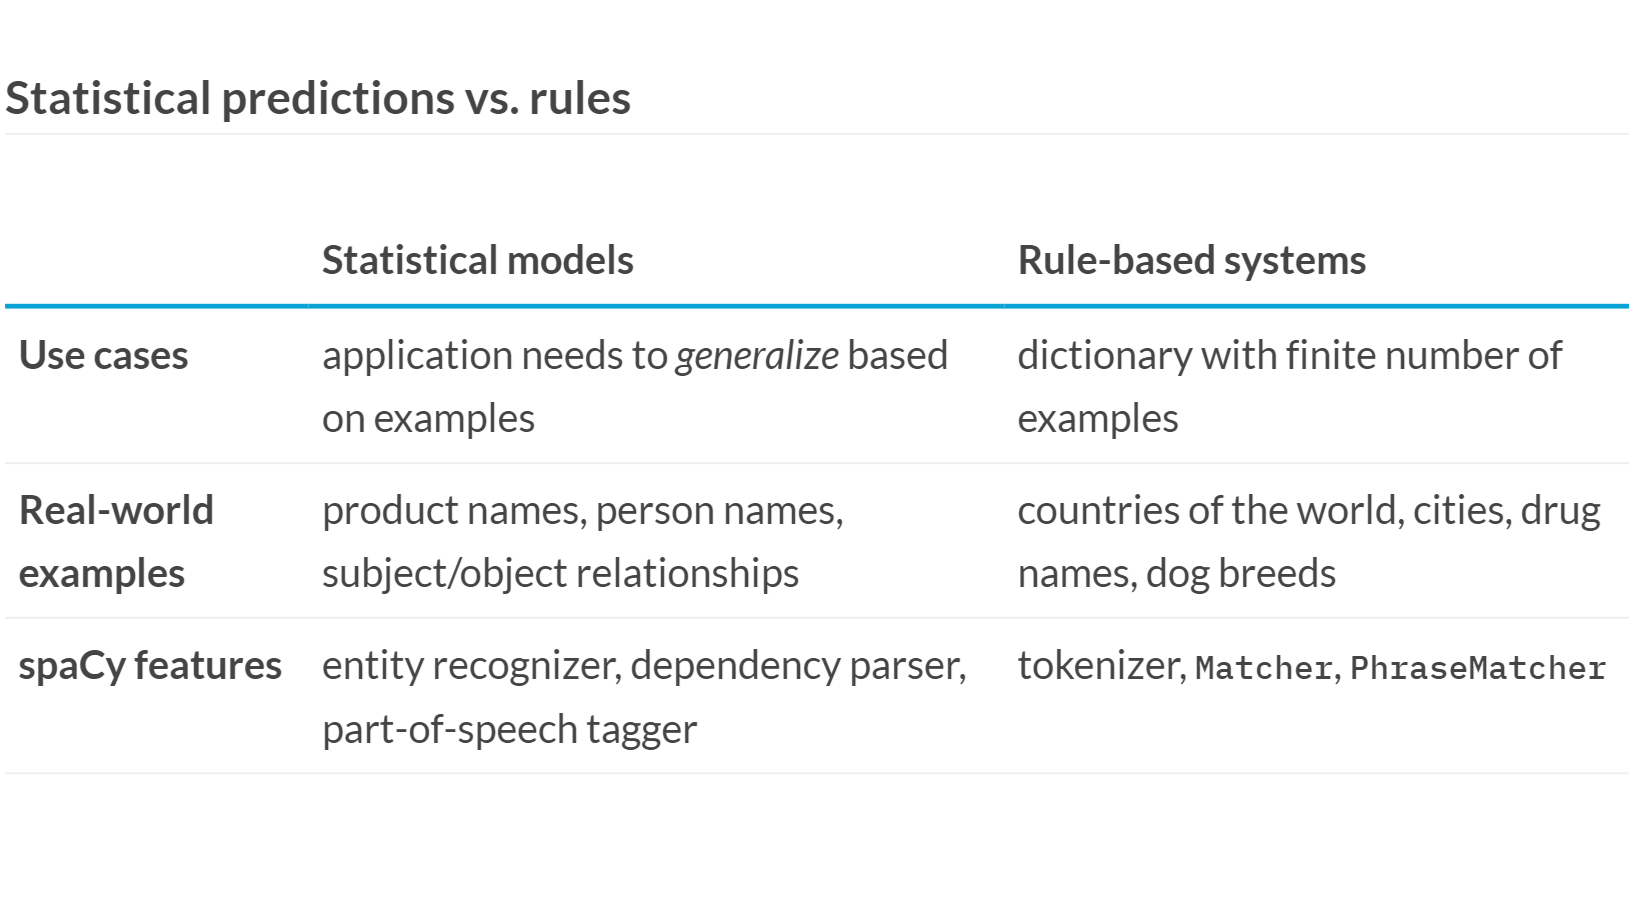

###Efficient phrase matching (1)
PhraseMatcher like regular expressions or keyword search – but with access to the tokens!
Takes Doc object as patterns
More efficient and faster than the Matcher
Great for matching large word lists

The phrase matcher is another helpful tool to find sequences of words in your data.

It performs a keyword search on the document, but instead of only finding strings, it gives you direct access to the tokens in context.

It takes Doc objects as patterns.

It's also really fast.

This makes it very useful for matching large dictionaries and word lists on large volumes of text.

Here's an example.

The phrase matcher can be imported from spacy.matcher and follows the same API as the regular matcher.

Instead of a list of dictionaries, we pass in a Doc object as the pattern.

We can then iterate over the matches in the text, which gives us the match ID, and the start and end of the match. This lets us create a Span object for the matched tokens "Golden Retriever" to analyze it in context.

**The tokenizer doesn’t create tokens for single spaces, so there’s no token with the value " " in between.**

In [ ]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


In [ ]:
# import spacy
# from spacy.matcher import PhraseMatcher
# from spacy.tokens import Span
# import json

# #with open("exercises/en/countries.json", encoding="utf8") as f:
#     COUNTRIES = json.loads(f.read())
# #with open("exercises/en/country_text.txt", encoding="utf8") as f:
#     TEXT = f.read()

# nlp = spacy.load("en_core_web_sm")
# matcher = PhraseMatcher(nlp.vocab)
# patterns = list(nlp.pipe(COUNTRIES))
# matcher.add("COUNTRY", patterns)

# # Create a doc and reset existing entities
# doc = nlp(TEXT)
# doc.ents = []

# # Iterate over the matches
# for match_id, start, end in matcher(doc):
#     # Create a Span with the label for "GPE"
#     span = Span(doc, start, end, label="GPE")

#     # Overwrite the doc.ents and add the span
#     doc.ents = list(doc.ents) + [span]

#     # Get the span's root head token
#     span_root_head = span.root.head
#     # Print the text of the span root's head token and the span text
#     print(span_root_head.text, "-->", span.text)

# # Print the entities in the document
# print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

#Processing Pipelines
paCy ships with a variety of built-in pipeline components. Here are some of the most common ones that you'll want to use in your projects.

The part-of-speech tagger sets the token.tag and token.pos attributes.

The dependency parser adds the token.dep and token.head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

The named entity recognizer adds the detected entities to the doc.ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc.cats property.

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

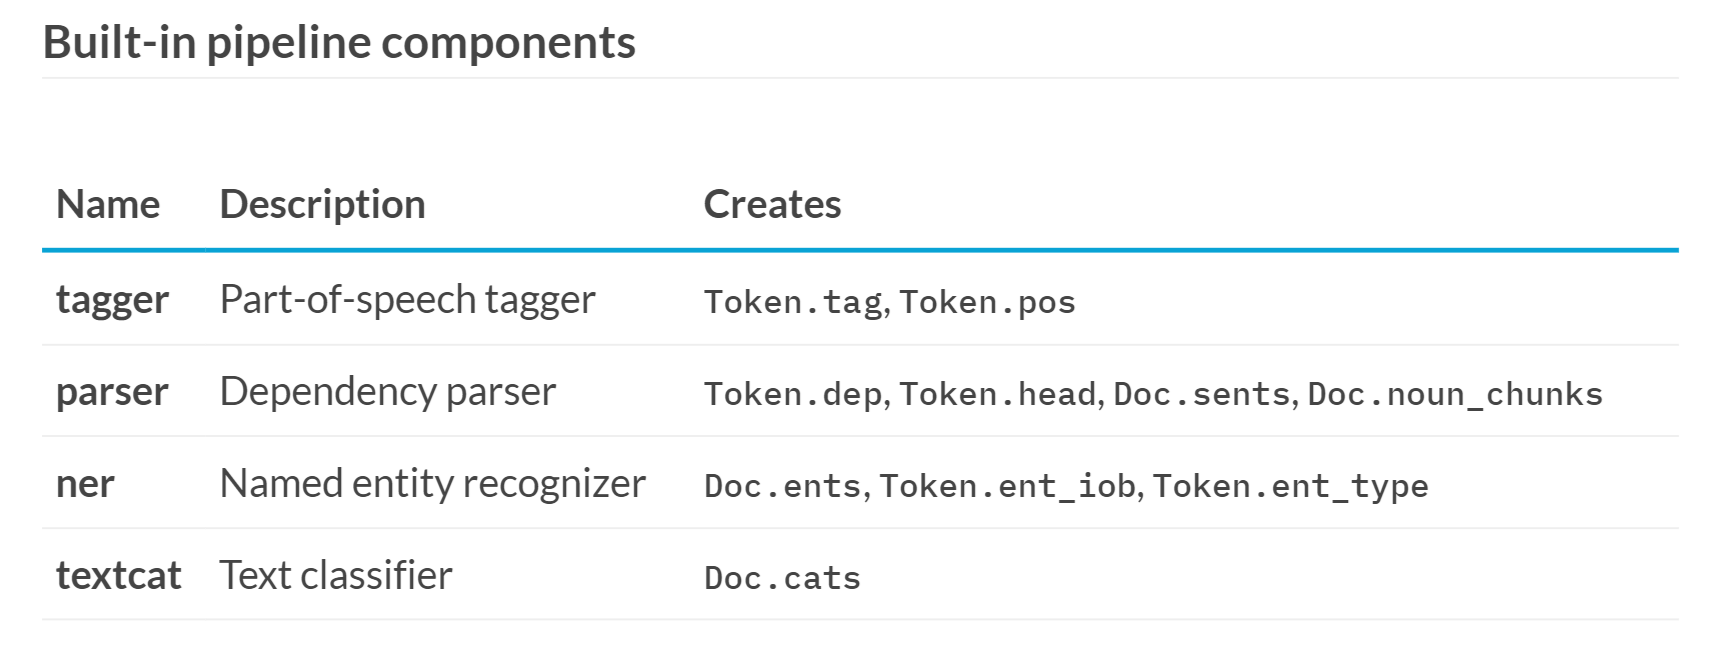

To see the names of the pipeline components present in the current nlp object, you can use the nlp.pipe_names attribute

In [ ]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7b7b5406b700>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7b7a1567aec0>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7b7a2477f840>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7b7a15551440>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7b7a15543e00>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7b7a247ca960>)]


**The tokenizer turns a string of text into a Doc object. spaCy then applies every component in the pipeline on document, in order.**

###Why custom components?
After the text is tokenized and a Doc object has been created, pipeline components are applied in order. spaCy supports a range of built-in components, but also lets you define your own.

Custom components are executed automatically when you call the nlp object on a text.

They're especially useful for adding your own custom metadata to documents and tokens.

You can also use them to update built-in attributes, like the named entity spans

###Anatomy of a component (1)
Function that takes a doc, modifies it and returns it
Registered using the Language.component decorator
Can be added using the nlp.add_pipe method

In [ ]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

<function __main__.custom_component_function(doc)>

To specify where to add the component in the pipeline, you can use the following keyword arguments:

Setting last to True will add the component last in the pipeline. This is the default behavior.

Setting first to True will add the component first in the pipeline, right after the tokenizer.

The before and after arguments let you define the name of an existing component to add the new component before or after. For example, before="ner" will add it before the named entity recognizer.

The other component to add the new component before or after needs to exist, though – otherwise, spaCy will raise an error.
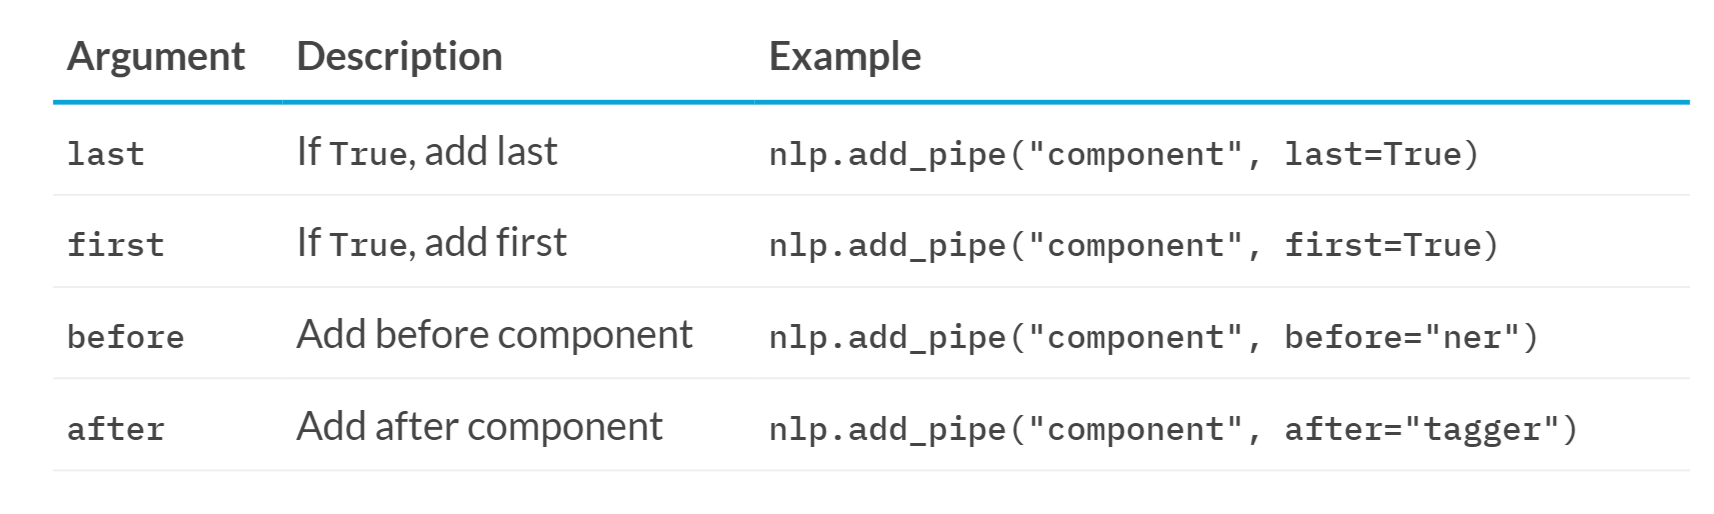

In [ ]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
doc = nlp("Hello world!")

Doc length: 3


**Custom components are added to the pipeline after the language class is already initialized and after tokenization, so they’re not suitable to add new languages.**

**Custom components are great for adding custom values to documents, tokens and spans, and customizing the doc.ents.**

**Custom components can only modify the Doc and can’t be used to update weights of other components directly.**

###Setting custom attributes

Custom attributes let you add any metadata to docs, tokens and spans. The data can be added once, or it can be computed dynamically.

Custom attributes are available via the ._ (dot underscore) property. This makes it clear that they were added by the user, and not built into spaCy, like token.text.

Attributes need to be registered on the global Doc, Token and Span classes you can import from spacy.tokens. You've already worked with those in the previous chapters. To register a custom attribute on the Doc, Token and Span, you can use the set_extension method.

The first argument is the attribute name. Keyword arguments let you define how the value should be computed. In this case, it has a default value and can be overwritten.

In [ ]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)

In [ ]:
doc._.title = "My document"
token._.is_color = True
span._.has_color = False

Extension attribute types
Attribute extensions
Property extensions
Method extensions

###Attribute extensions
Attribute extensions set a default value that can be overwritten.

For example, a custom is_color attribute on the token that defaults to False.

On individual tokens, its value can be changed by overwriting it – in this case, True for the token "blue".

In [ ]:
from spacy.tokens import Token

# Set extension on the Token with default value
Token.set_extension("is_color", default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

ValueError: ignored

###Property extensions
Property extensions work like properties in Python: they can define a getter function and an optional setter.

The getter function is only called when you retrieve the attribute. This lets you compute the value dynamically, and even take other custom attributes into account.

Getter functions take one argument: the object, in this case, the token. In this example, the function returns whether the token text is in our list of colors.

We can then provide the function via the getter keyword argument when we register the extension.

The token "blue" now returns True for ._.is_color.

In [ ]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("is_color", getter=get_is_color)

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

In [ ]:
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

###Method extensions
Method extensions make the extension attribute a callable method.

You can then pass one or more arguments to it, and compute attribute values dynamically – for example, based on a certain argument or setting.

In this example, the method function checks whether the doc contains a token with a given text. The first argument of the method is always the object itself – in this case, the doc. It's passed in automatically when the method is called. All other function arguments will be arguments on the method extension. In this case, token_text.

Here, the custom ._.has_token method returns True for the word "blue" and False for the word "cloud".

In [ ]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

##Processing large volumes of text
If you need to process a lot of texts and create a lot of Doc objects in a row, the nlp.pipe method can speed this up significantly.

It processes the texts as a stream and yields Doc objects.

It is much faster than just calling nlp on each text, because it batches up the texts.

nlp.pipe is a generator that yields Doc objects, so in order to get a list of docs, remember to call the list method around it.


``docs = list(nlp.pipe(LOTS_OF_TEXTS))``

nlp.pipe also supports passing in tuples of text / context if you set as_tuples to True.

The method will then yield doc / context tuples.

This is useful for passing in additional metadata, like an ID associated with the text, or a page number.

In [ ]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

Doc length: 4
Doc length: 3
This is a text 15
And another text 16


You can even add the context metadata to custom attributes.

In this example, we're registering two extensions, id and page_number, which default to None.

After processing the text and passing through the context, we can overwrite the doc extensions with our context metadata.

In [ ]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

Doc length: 4
Doc length: 3


Another common scenario: Sometimes you already have a model loaded to do other processing, but you only need the tokenizer for one particular text.

Running the whole pipeline is unnecessarily slow, because you'll be getting a bunch of predictions from the model that you don't need.

In [ ]:
doc = nlp.make_doc("Hello world!")

spaCy also allows you to temporarily disable pipeline components using the nlp.select_pipes context manager.

It accepts the keyword arguments enable or disable that can define a list of string names of the pipeline components to disable. For example, if you only want to use the entity recognizer to process a document, you can temporarily disable the tagger and parser.

After the with block, the disabled pipeline components are automatically restored.

In the with block, spaCy will only run the remaining components.

In [ ]:
# Disable tagger and parser
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

#Training and updating models

Before we get starting with explaining how, it's worth taking a second to ask ourselves: Why would we want to update the model with our own examples? Why can't we just rely on pre-trained pipelines?

Statistical models make predictions based on the examples they were trained on.

You can usually make the model more accurate by showing it examples from your domain.

You often also want to predict categories specific to your problem, so the model needs to learn about them.

This is essential for text classification, very useful for entity recognition and a little less critical for tagging and parsing.

spaCy supports updating existing models with more examples, and training new models. If we're not starting with a trained pipeline, we first initialize the weights randomly.

Next, spaCy calls nlp.update, which predicts a batch of examples with the current weights.

The model then checks the predictions against the correct answers, and decides how to change the weights to achieve better predictions next time.

Finally, we make a small correction to the current weights and move on to the next batch of examples.

spaCy then continues calling nlp.update for each batch of examples in the data. During training, you usually want to make multiple passes over the data and train until the model stops improving.

Example: Training the entity recognizer
The entity recognizer tags words and phrases in context
Each token can only be part of one entity
Examples need to come with context

``doc = nlp("iPhone X is coming")``

``doc.ents = [Span(doc, 0, 2, label="GADGET")]``
Texts with no entities are also important
``doc = nlp("I need a new phone! Any tips?")``
``doc.ents = []``

Goal: teach the model to generalize

In [ ]:
import spacy

nlp = spacy.blank("en")

# Create a Doc with entity spans
doc1 = nlp("iPhone X is coming")
doc1.ents = [Span(doc1, 0, 2, label="GADGET")]
# Create another doc without entity spans
doc2 = nlp("I need a new phone! Any tips?")

docs = [doc1, doc2]

In [ ]:
# split data into two portions:
# training data: used to update the model
# development data: used to evaluate the model
import random

random.shuffle(docs)
train_docs = docs[:len(docs) // 2]
dev_docs = docs[len(docs) // 2:]


# Create and save a collection of training docs
train_docbin = DocBin(docs=train_docs)
train_docbin.to_disk("./train.spacy")
# Create and save a collection of evaluation docs
dev_docbin = DocBin(docs=dev_docs)
dev_docbin.to_disk("./dev.spacy")

###The training config (1)

spaCy uses a config file, usually called config.cfg, as the "single source of truth" for all settings. The config file defines how to initialize the nlp object, which pipeline components to add and how their internal model implementations should be configured. It also includes all settings for the training process and how to load the data, including hyperparameters.

Instead of providing lots of arguments on the command line or having to remember to define every single setting in code, you only need to pass your config file to spaCy's training command.

Config files also help with reproducibility: you'll have all settings in one place and always know how your pipeline was trained. You can even check your config file into a Git repo to version it and share it with others so they can train the same pipeline with the same settings.



---



---



In [ ]:
def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    """Loads the IMDb movie reviews sentiment analysis dataset.

    # Arguments
        data_path: string, path to the data directory.
        seed: int, seed for randomizer.

    # Returns
        A tuple of training and validation data.
        Number of training samples: 25000
        Number of test samples: 25000
        Number of categories: 2 (0 - negative, 1 - positive)

    # References
        Mass et al., http://www.aclweb.org/anthology/P11-1015

        Download and uncompress archive from:
        http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    """
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname)) as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname)) as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return ((train_texts, np.array(train_labels)),
            (test_texts, np.array(test_labels)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()

In [ ]:
https://developers.google.com/machine-learning/guides/text-classification/step-2-5